# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [16]:
#I wanted to get all of the importing out of the way at the start so I put them here instead of waiting until I got to the section they were called/needed

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing numpy and pandas libraries to read the data
import numpy as np
import pandas as pd

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split

# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Read the given CSV file, and view some sample records

k_dramas = pd.read_csv('k_dramas - Copy.csv')

In [17]:
k_dramas.head(1)

,Unnamed: 0,tmdb_id,series,network,genre,seasons,episodes,episode_run_time,synopsis,pop series,...,known_for_department,sex,pop actor,place_of_birth,birthday,birth_yr,birth_month,birth_weekday,deathday,headshot
0,0,208249,Game of Witches,MBC,Drama,1.0,29.0,30.0,Yu Kyung is a successful woman who is proficie...,414.151,...,Acting,1.0,1.934,"Seoul, South Korea",1972-01-05,1972.0,1.0,2.0,NaN,https://image.tmdb.org/t/p/original/zxjXig4bOT...


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

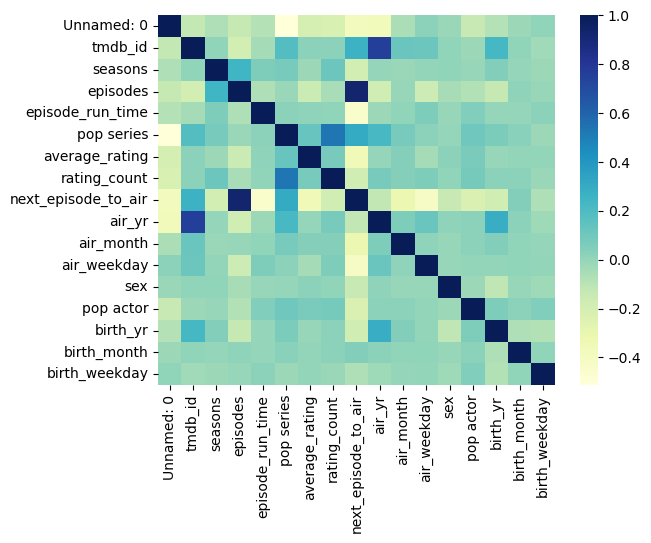

In [18]:
sns.heatmap(k_dramas.corr(), cmap="YlGnBu")
plt.show()

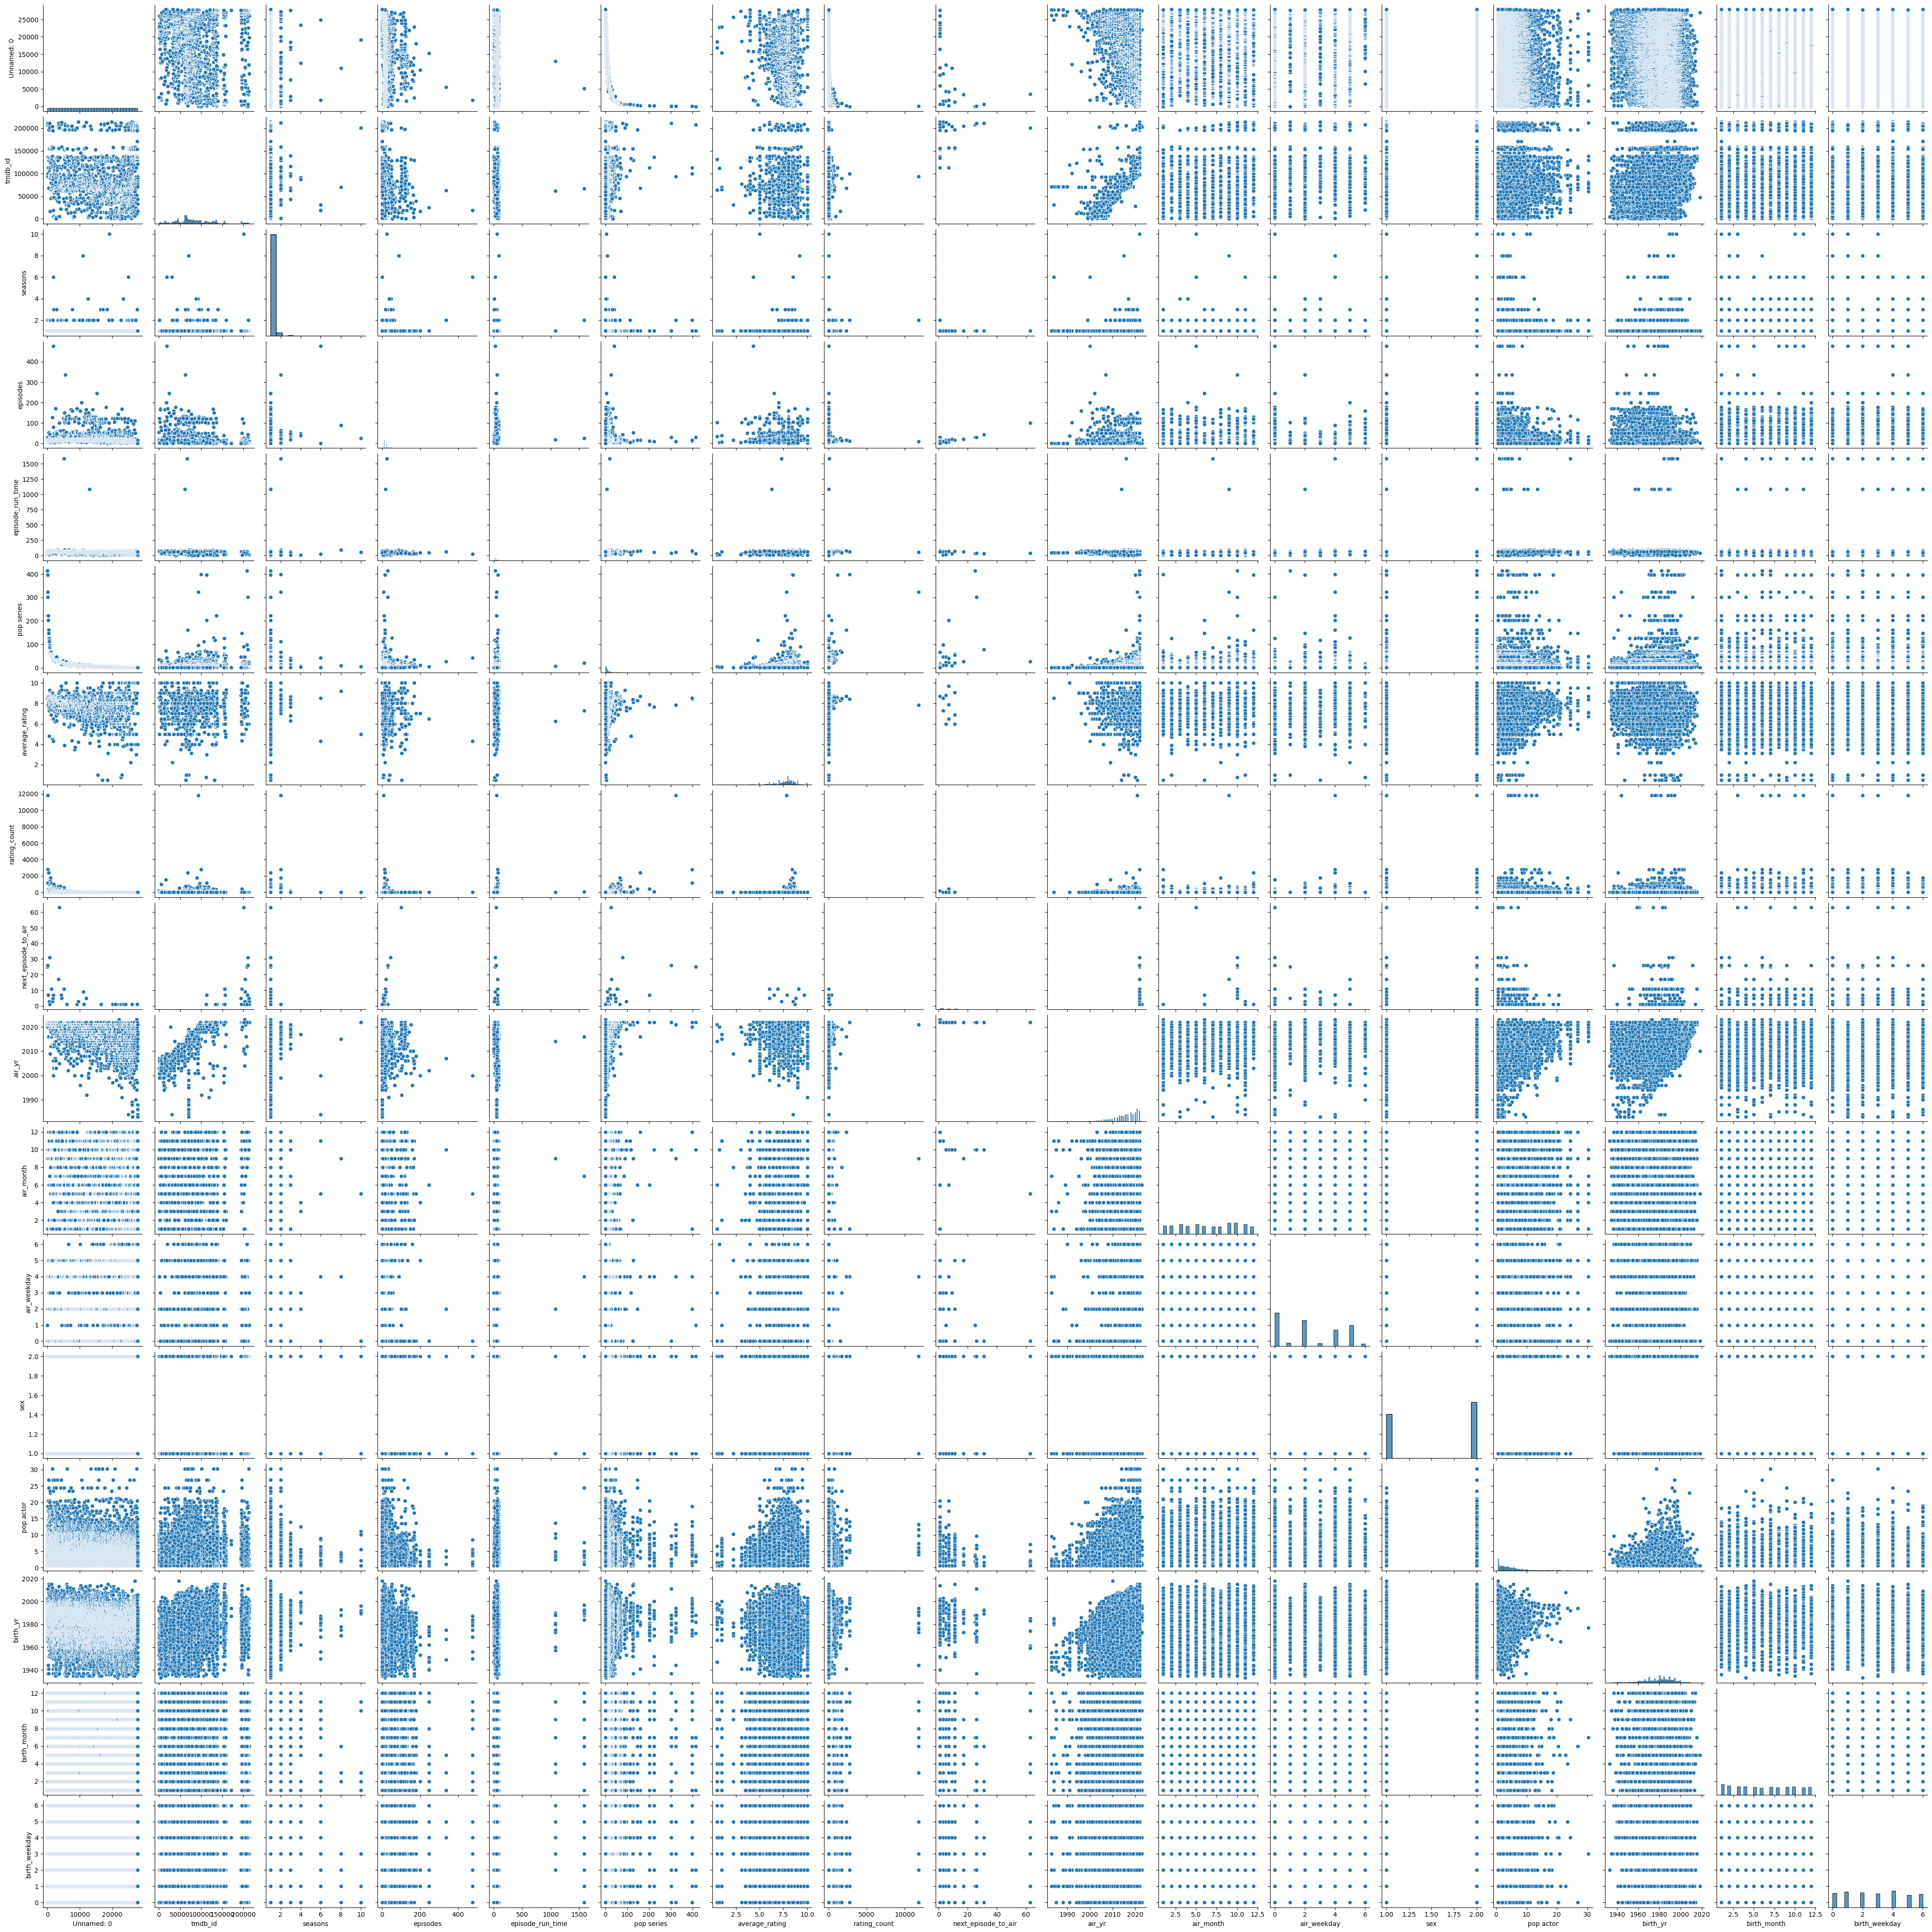

In [16]:
# Using pairplot to visualize the data for correlation
sns.pairplot(k_dramas)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [36]:
# I tried multiple combinations of variables with stronger correclations but they wouldn't work for modeling (I think because one column had some nan values). I couldn't get a const, r-value or anything
    ##X = k_dramas['tmdb_id']
    ##y = k_dramas['air_yr']

#this combo produced something that finally worked!
#assigning X and y
#Creating X and y
X = k_dramas['pop series']
y = k_dramas['pop actor']

In [37]:
# create train and test sets
# Splitting the varaibles as training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [38]:
X_train


26962     1.156
13240     6.438
25527     1.764
7082     14.744
18235     5.626
          ...  
12119     8.331
24423     1.370
14147     6.938
23320     2.434
5640     18.372
Name: pop series, Length: 19509, dtype: float64

In [39]:
y_train

26962    0.600
13240    2.914
25527    2.867
7082     9.087
18235    2.677
         ...  
12119    3.280
24423    1.886
14147    3.590
23320    3.725
5640     9.980
Name: pop actor, Length: 19509, dtype: float64

In [40]:
# building the model

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const         4.269847
pop series    0.012231
dtype: float64

In [41]:
#I had to view this again because my combinations of variables weren't working out before so I looked at this to check data types and see if that was the issue
#then I went and looked at non-nulls and picked two values that had the full 27871 amount of entries
k_dramas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27871 entries, 0 to 27870
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            27871 non-null  int64  
 1   tmdb_id               27871 non-null  int64  
 2   series                27871 non-null  object 
 3   network               24082 non-null  object 
 4   genre                 27871 non-null  object 
 5   seasons               27871 non-null  float64
 6   episodes              27823 non-null  float64
 7   episode_run_time      25948 non-null  float64
 8   synopsis              27080 non-null  object 
 9   pop series            27871 non-null  float64
 10  average_rating        24258 non-null  float64
 11  rating_count          24258 non-null  float64
 12  next_episode_to_air   550 non-null    float64
 13  air_dt                27427 non-null  object 
 14  air_yr                27427 non-null  float64
 15  air_month          

In [42]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pop actor   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     247.3
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           2.25e-55
Time:                        05:53:49   Log-Likelihood:                -52601.
No. Observations:               19509   AIC:                         1.052e+05
Df Residuals:                   19507   BIC:                         1.052e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2698      0.029    149.753      0.000       4.214       4.326
pop series     0.0122      0.001     15.725      0.000       0.011       0.014
==============================================================================
Omnibus:                     7704.039   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38964.990
Skew:                           1.862   Prob(JB):                         0.00
Kurtosis:                       8.836   Cond. No.                         40.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

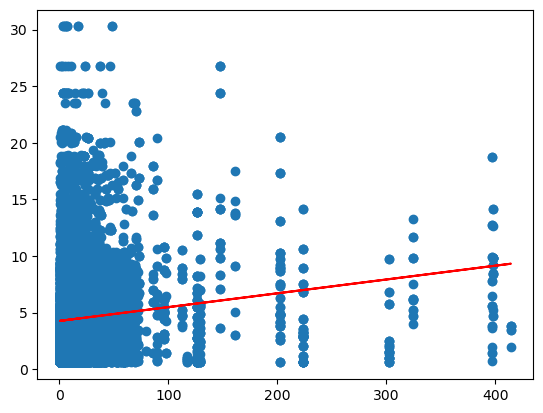

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 4.2698 + 0.0122*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

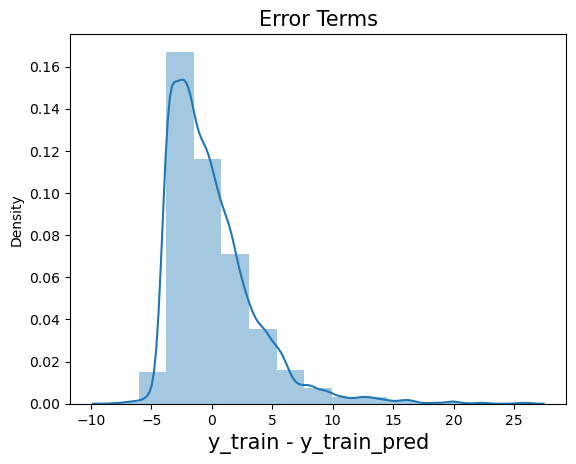

In [45]:
# performing residual analysis

# Predicting y_value using traing data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

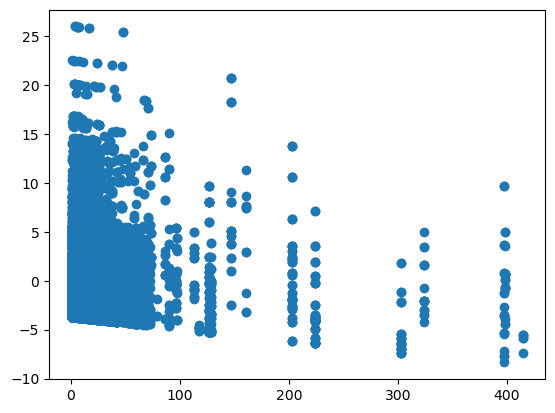

In [46]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 
    - 0.013

2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 
    - No, it didn't provide much insight or prediction for this dataset.
3. Was your plot of the error terms a bell curve? 
    - No, it has a positive skew and looks to have a Leptokurtic distribution.